In [6]:
#checking that torch is using the GPU 
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline
import wandb
wandb.login()
#run on gpu if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#torch.cuda.is_available()
# torch.cuda.device_count()
# torch.cuda.current_device()
# torch.cuda.device(0)
#torch.cuda.get_device_name(0)

In [7]:
config = dict(
    input_size = 784 # flattened 28x28 images
    hidden_size = 500 
    num_classes = 10 # numbers from 0 to 9 
    num_epochs = 20
    batch_size = 100
    learning_rate = 0.001,
    dataset='MNIST',
    architecture='CNN'
    )

input_size = 784 # flattened 28x28 images
hidden_size = 500 
num_classes = 10 # numbers from 0 to 9 
num_epochs = 20
batch_size = 100
learning_rate = 0.001

In [8]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size,shuffle=False)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape,labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


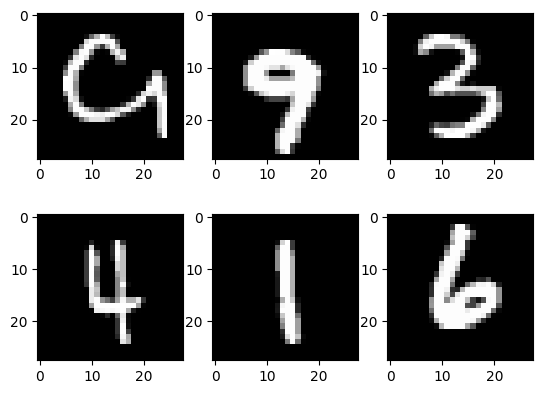

In [9]:
#take a look at the data 

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i,0,:,:],cmap='gray') # i , 0 because we want the FIRST channel

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(NeuralNet,self).__init__()
        self.l1=nn.Linear(input_size,hidden_size)
        self.relu=nn.ReLU()
        self.l2=nn.Linear(hidden_size,num_classes)
        
    def forward(self,x):
        out=self.l1(x)
        out=self.relu(out)
        out=self.l2(out)
        return out
        
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

criterion = nn.CrossEntropyLoss() #this will apply the softmax so we dont have to apply it above

optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

#training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        #shape of images 100, 1, 28, 28 
        # 784 needed by image tensor 
        # so 100 * 784 
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        
        #forward
        outputs= model(images)
        loss= criterion(outputs,labels)
        
        #backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps},loss={loss.item():.4f}')
        

In [ ]:
#test 

with torch.no_grad():
    n_correct = 0 
    n_samples = 0 
    
    for images , labels in test_loader: 
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        outputs = model(images) #trained model now
        
        _,predictions = torch.max(outputs,1) #returns the value and index, we are only interesed in the value though
        
        n_samples += labels.shape[0]
        n_correct += (predictions ==labels).sum().item()
        
    acc= 100.0 * n_correct / n_samples
    
    print(f'accuracy is {acc}')